### Analyzing the Stroop Effect
#### by Christoph Knoop
Perform the analysis in the space below. Remember to follow the instructions and review the project rubric before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

**(1) What is the independent variable? What is the dependent variable?**

The **independent variable** (or sometimes called experimental oder prdictor variable) is the variable, which is being manipulated for the experiment. In our case it is the color of the ink used to write the words - or, to be more precise, the fact whether the meaning of the word's content is related to the colour of the letters or not. 

The **dependent variable** is the time that participants need to complete the test. 

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

The H-0-Hypothesis assumes that we will not see any significant differences between the two tests, so the formula is:  

$\begin{equation*}
\mathbf{H}_0  = \mu_c - \mu_i \geq \mathbf {0}
\end{equation*}$

The hypothesis we want to prove, however, assumes that the tests with the congruent elements are completed faster than the tests with the incongruent elements. So the formula is: 

$\begin{equation*}
\mathbf{H}_1  = \mu_c - \mu_i < \mathbf {0}
\end{equation*}$




**Definition**: 

$\begin{equation*}
\mathbf{H}_0
\end{equation*}$ - 
the Symbol for our null hypothesis (no significant differences between the two tests). The null hypothesis often states that there is no effect or that the relationship investigated does not exist. This thesis must be discarded in order to accept the alternative hypothesis. This procedure is intended to minimize the possibility of a class 1 error (assuming the alternative hypothesis, although the null hypothesis is correct). 

$\begin{equation*}
\mathbf{H}_1
\end{equation*}$ - 
the Symbol for the alternative hypothesis. Usually this hypothesis should be proven (means: the H0 hypothesis should be rejected). The alternative hypothesis must not overlap with the null hypothesis. 


$\begin{equation*}
\mu_c
\end{equation*}$ - Symbol for the population mean of needed time during experiments in which color and word meaning are congruent.

$\begin{equation*}
\mu_i
\end{equation*}$ - Symbol for the population mean of needed time during experiments in which color and word meaning are incongruent.


We choose a Paired T test here to verify our results. The reason: We are dealing here with the results of one test person, i.e. value pairs. We can best examine these with the Paired-T test. 

We assume that the population data is distributed almost normally. Furthermore, we assume (central limit theorem) that the mean values of the samples are normally distributed with sufficiently high data. However, the sample of 24 is relatively small. As a rule of thumb: from a sample of 30, we can assume that the mean values are normally distributed. 

But: The more similar the measured values are in a population, the sooner we can assume that the sample is also normally distributed despite the small number of values. This is given here. 

Since we do not know the variance of the population and the sample size of 24 is less than 30, a Z-test is not possible. 





**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**


In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("stroopdata.csv")
df.head(10)


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [67]:
# Mean of congruent and incongruent test
avg_cong = df["Congruent"].mean()
avg_incong = df["Incongruent"].mean()
print("Average congruent: {}".format(avg_cong))
print("Average incongruent: {}".format(avg_incong))


Average congruent: 14.051125000000004
Average incongruent: 22.01591666666667


In [68]:
# Median of both columns
med_cong = avg_cong = df["Congruent"].median()
med_incong = df["Incongruent"].median()
print("Median congruent: {}".format(med_cong))
print("Median incongruent: {}".format(med_incong))

Median congruent: 14.3565
Median incongruent: 21.0175


In [8]:
# Sample Standard Deviation of congruent and incongruent test
std_cong = np.std(df["Congruent"], ddof=1)
std_incong = np.std(df["Incongruent"], ddof=1)
print ("Standard Deviation congruent: {}".format(std_cong))
print ("Standard Deviation incongruent: {}".format(std_incong))

Standard Deviation congruent: 3.559357957645195
Standard Deviation incongruent: 4.797057122469138


**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

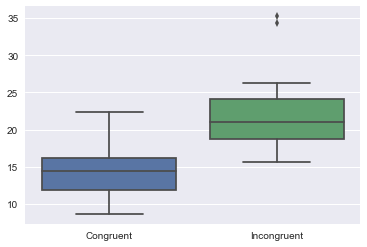

In [10]:
sns.boxplot(data = df )

It can be clearly seen that the test subjects were able to solve the test much faster with the ordered data. 


(array([ 1.,  0.,  1.,  0.,  0.,  5.,  5.,  4.,  1.,  7.]),
 array([-21.919 , -19.9221, -17.9252, -15.9283, -13.9314, -11.9345,
         -9.9376,  -7.9407,  -5.9438,  -3.9469,  -1.95  ]),
 <a list of 10 Patch objects>)

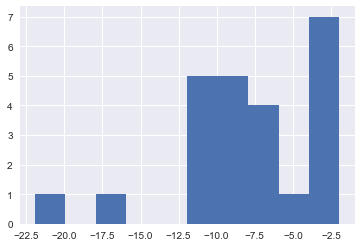

In [11]:
plt.hist(df["Congruent"] - df["Incongruent"])

If we look at the difference between the test times for the congruent and non-congruent test elements, we get a picture that also clearly indicates that the incongruent test takes more time: All times are negative, i.e. the congruent test is faster, the incongruent slower. 

**(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.**


For avoiding an Type-I-Error, we are setting alpha to 0.05. 
    

In [116]:
result = stats.ttest_rel(df["Congruent"], df["Incongruent"])
print(round(result[1], 5), result)

0.0 Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


The P value is significantly lower than the alpha value. This means that we can reject the H0 thesis and use the H1 thesis (tests with incongruent values take more time) instead, as we had already suspected. 

**(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

Processes that humans have internalized in such a way that they are largely automatic are difficult to suppress. If we deviate from our usual routines and have to use a new approach when solving a task, it is rather difficult and takes time. 

This phenomenon is not only likely to occur in the automated process of reading, but in many other areas of life. Wherever what has been learned runs automatically after some time, it costs a lot of concentration to approach things differently. One example is sport. For example, anyone who has used a certain stroke technique in table tennis for ten years and should suddenly change it will also need time. 